Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/Github/PAC/cnn

/content/drive/MyDrive/Github/PAC/cnn


# Treinamento

In [3]:
import data
import aimodel
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.color import label2rgb
plt.style.use('ggplot')

In [17]:
%%time
dataset = (x_train, y_train), (x_test, y_test) = data.load_dataset(grayscale=True, augmentation=True, weights=False)

CPU times: user 569 ms, sys: 49.9 ms, total: 619 ms
Wall time: 682 ms


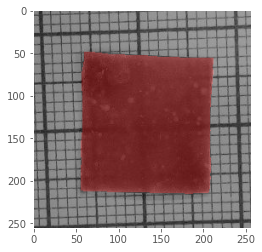

In [5]:
i = np.random.randint(len(x_train))
plt.imshow(label2rgb(y_train[i, :, :, 0].numpy(), x_train[i, :, :, 0].numpy(), bg_label=0))
plt.grid(False)
plt.show()

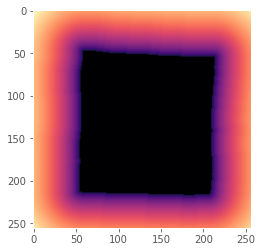

In [6]:
plt.imshow(y_train[i, :, :, 1], cmap='magma')
plt.grid(False)

In [21]:
unet = aimodel.UNet(name='U-Net', dataset=dataset).build((16, 32, 64), activation='hard_sigmoid')
unet.compile(optimizer=tf.keras.optimizers.Adam(1e-3, decay=1e-3/150), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[aimodel.amape])

/content/drive/MyDrive/Github/PAC/cnn/aimodel.py:33: UserWarning: Nome alterado para U-Net4, pois uma U-Net com este nome já foi salva.
  if changed: warn(f'Nome alterado para {name}, pois uma U-Net com este nome já foi salva.')


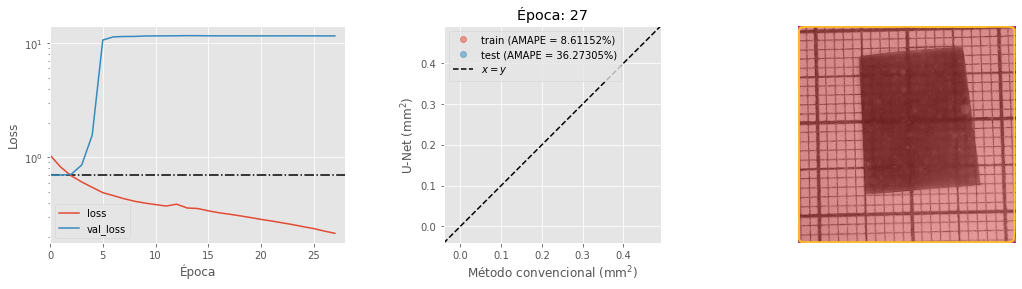

,epoch,amape,loss,val_amape,val_loss
0,0,24.042646,1.044605,13.303569,0.694776


7/7 [==============================] - 132s 20s/step - loss: 0.2153 - amape: 8.6115 - val_loss: 11.5763 - val_amape: 36.2731
Epoch 29/150
7/7 [==============================] - 103s 15s/step - loss: 0.2052 - amape: 8.3766 - val_loss: 11.5655 - val_amape: 36.2627
Epoch 30/150
7/7 [==============================] - 101s 14s/step - loss: 0.1952 - amape: 8.3467 - val_loss: 11.5525 - val_amape: 36.2534
Epoch 31/150
4/7 [================>.............] - ETA: 47s - loss: 0.1872 - amape: 8.0857 

In [ ]:
history = unet.fit(150, batch_size=len(x_train)//6, period=3)